In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better visualizations
plt.style.use("ggplot")
sns.set_palette("Set2")

In [24]:
# Starting amounts
initial_investment = 50  # Initial lump sum
monthly_contribution = 150  # Starting monthly contribution

# Projection settings
years = 30
annual_return = 0.08  # Nominal annual return
annual_increase_rate = 0.03  # % yearly increase in contribution (salary growth)
annual_inflation_rate = 0.00  # Optional: set to 0 to ignore

# Lump sums: list of tuples (year, amount)
lump_sums = [
    (5, 1000),
    (10, 2000),
    (15, 5000),
]  # Example: add €1,000 in year 5 and €2,000 in year 10

monthly_rate = annual_return / 12
n_months = years * 12


In [25]:
results = []

total_contributions = initial_investment
total_value = initial_investment
monthly_contrib = monthly_contribution

# For inflation adjustment
real_annual_return = (
    ((1 + annual_return) / (1 + annual_inflation_rate)) - 1
    if annual_inflation_rate
    else annual_return
)
real_monthly_rate = real_annual_return / 12

for year in range(1, years + 1):
    for month in range(1, 13):
        # Add this month's contribution
        total_value = total_value * (1 + monthly_rate) + monthly_contrib
        total_contributions += monthly_contrib

    # Apply lump sums at year end if any
    lumps = [amount for (y, amount) in lump_sums if y == year]
    for lump in lumps:
        total_value += lump
        total_contributions += lump

    # Apply annual increase to monthly contributions
    monthly_contrib *= 1 + annual_increase_rate

    # Record year-end results
    investment_gain = total_value - total_contributions
    results.append(
        {
            "Year": year,
            "Total Contributions (€)": round(total_contributions, 2),
            "Investment Gain (€)": round(investment_gain, 2),
            "Total Value (€)": round(total_value, 2),
        }
    )


In [26]:
df = pd.DataFrame(results)
df

,Year,Total Contributions (€),Investment Gain (€),Total Value (€)
0,1,1850.00,71.64,1921.64
1,2,3704.00,300.65,4004.65
2,3,5613.62,704.63,6318.25
3,4,7580.53,1302.79,8883.32
4,5,10606.44,2116.06,12722.50
5,6,12693.14,3250.26,15943.40
6,7,14842.43,4654.14,19496.57
7,8,17056.20,6355.35,23411.55
8,9,19336.39,8383.99,27720.38
9,10,23684.98,10772.82,34457.81


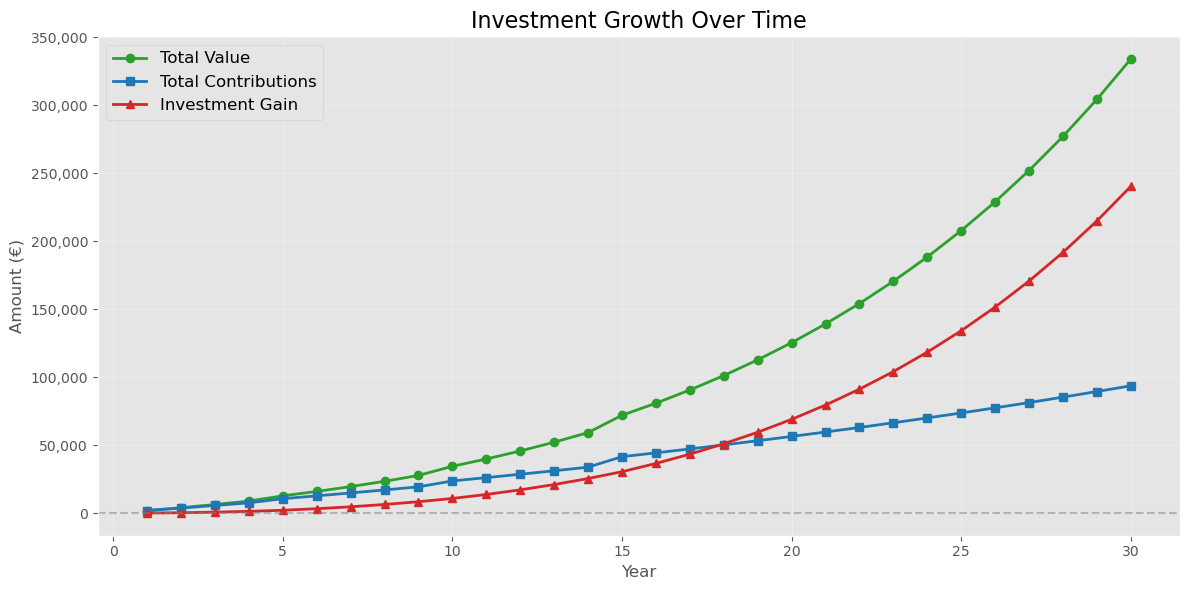

In [27]:
# Create a line chart to visualize investment growth over time
plt.figure(figsize=(12, 6))
plt.plot(
    df["Year"],
    df["Total Value (€)"],
    marker="o",
    linewidth=2,
    color="#2ca02c",
    label="Total Value",
)
plt.plot(
    df["Year"],
    df["Total Contributions (€)"],
    marker="s",
    linewidth=2,
    color="#1f77b4",
    label="Total Contributions",
)
plt.plot(
    df["Year"],
    df["Investment Gain (€)"],
    marker="^",
    linewidth=2,
    color="#d62728",
    label="Investment Gain",
)

# Add labels and title
plt.title("Investment Growth Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Amount (€)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

# Add a horizontal line at y=0 for reference
plt.axhline(y=0, color="gray", linestyle="--", alpha=0.5)

# Format y-axis with comma as thousands separator
plt.gca().get_yaxis().set_major_formatter(
    plt.matplotlib.ticker.StrMethodFormatter("{x:,.0f}")
)

plt.tight_layout()
plt.show()

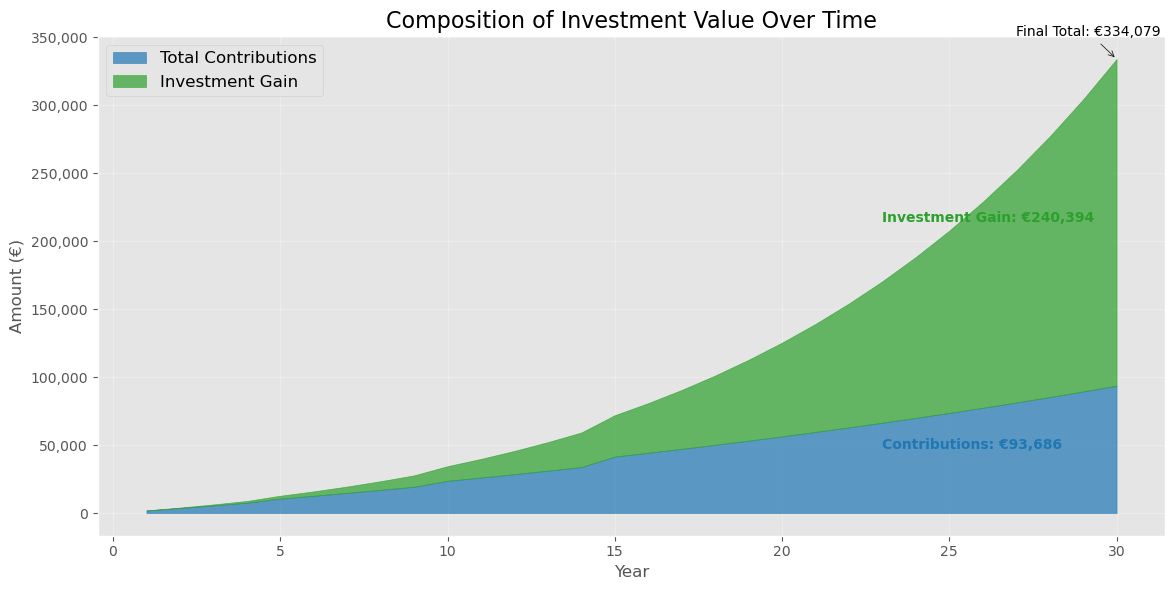

In [28]:
# Create a stacked area chart to show the proportion of contributions vs. investment gains
plt.figure(figsize=(12, 6))

# Create the stacked area chart
plt.fill_between(
    df["Year"],
    0,
    df["Total Contributions (€)"],
    color="#1f77b4",
    alpha=0.7,
    label="Total Contributions",
)
plt.fill_between(
    df["Year"],
    df["Total Contributions (€)"],
    df["Total Value (€)"],
    color="#2ca02c",
    alpha=0.7,
    label="Investment Gain",
)

# Add labels and title
plt.title("Composition of Investment Value Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Amount (€)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12, loc="upper left")

# Format y-axis with comma as thousands separator
plt.gca().get_yaxis().set_major_formatter(
    plt.matplotlib.ticker.StrMethodFormatter("{x:,.0f}")
)

# Add text annotations for the final values
final_year = df["Year"].iloc[-1]
final_contribs = df["Total Contributions (€)"].iloc[-1]
final_value = df["Total Value (€)"].iloc[-1]
final_gain = df["Investment Gain (€)"].iloc[-1]

plt.annotate(
    f"Final Total: €{final_value:,.0f}",
    xy=(final_year, final_value),
    xytext=(final_year - 3, final_value + final_value * 0.05),
    arrowprops=dict(arrowstyle="->", color="black"),
)

plt.annotate(
    f"Contributions: €{final_contribs:,.0f}",
    xy=(final_year, final_contribs / 2),
    xytext=(final_year - 7, final_contribs / 2),
    color="#1f77b4",
    fontweight="bold",
)

plt.annotate(
    f"Investment Gain: €{final_gain:,.0f}",
    xy=(final_year, final_contribs + final_gain / 2),
    xytext=(final_year - 7, final_contribs + final_gain / 2),
    color="#2ca02c",
    fontweight="bold",
)

plt.tight_layout()
plt.show()

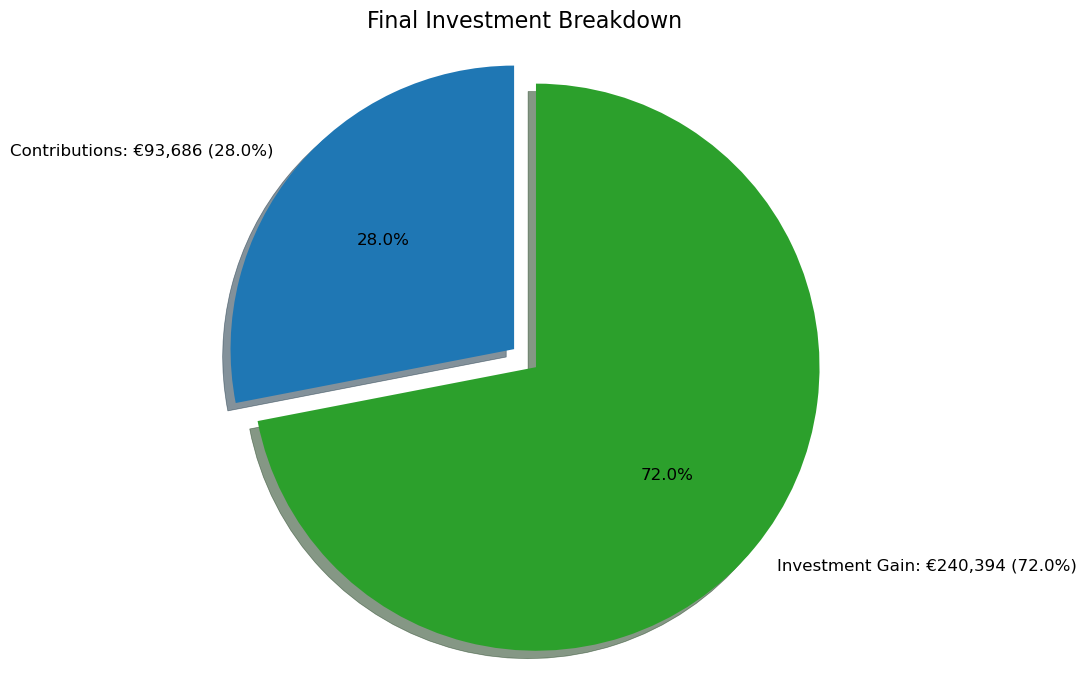

In [29]:
# Create a pie chart to show the final breakdown of contributions vs investment gains
plt.figure(figsize=(10, 7))

# Get the final values
final_contribs = df["Total Contributions (€)"].iloc[-1]
final_gain = df["Investment Gain (€)"].iloc[-1]

# Calculate percentages
total = final_contribs + final_gain
contrib_pct = (final_contribs / total) * 100
gain_pct = (final_gain / total) * 100

# Create the pie chart
labels = [
    f"Contributions: €{final_contribs:,.0f} ({contrib_pct:.1f}%)",
    f"Investment Gain: €{final_gain:,.0f} ({gain_pct:.1f}%)",
]
sizes = [final_contribs, final_gain]
colors = ["#1f77b4", "#2ca02c"]
explode = (0, 0.1)  # explode the investment gain slice

plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    colors=colors,
    autopct="%1.1f%%",
    startangle=90,
    shadow=True,
    textprops={"fontsize": 12},
)

plt.axis("equal")  # Equal aspect ratio ensures the pie chart is circular
plt.title("Final Investment Breakdown", fontsize=16)

plt.tight_layout()
plt.show()

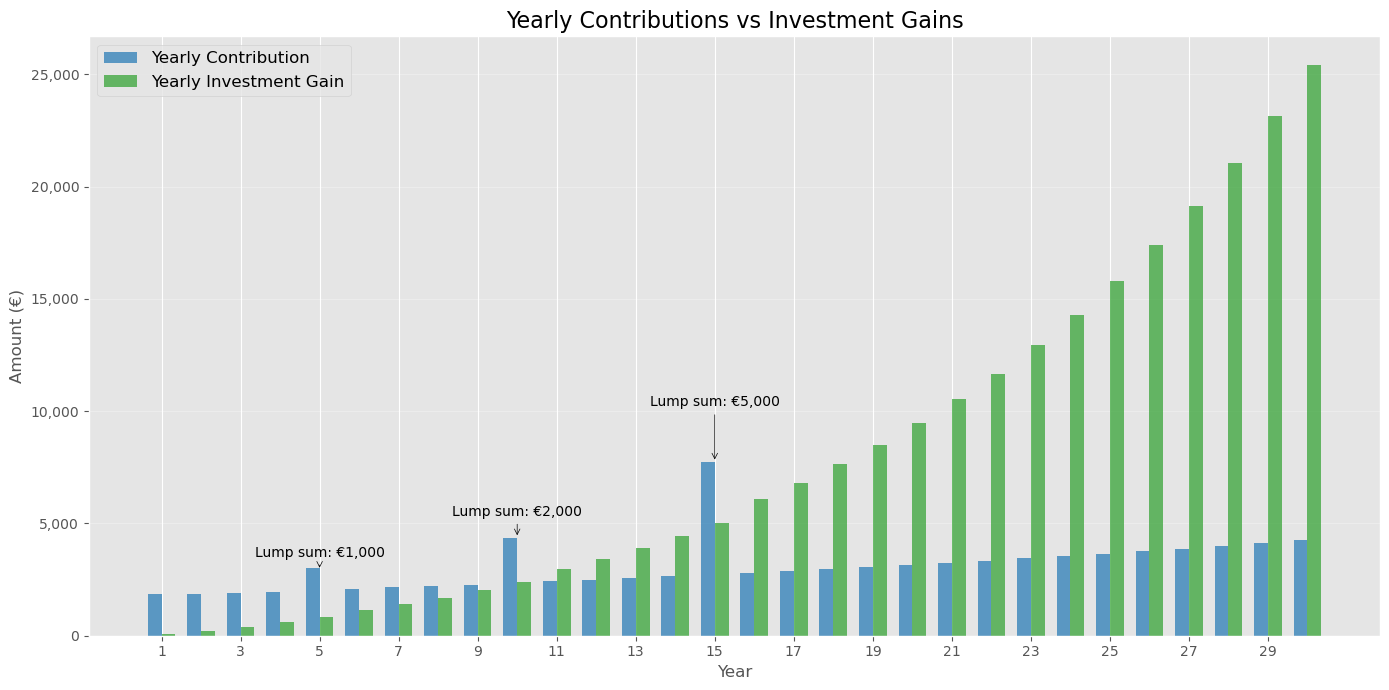

In [30]:
# Create a bar chart to visualize yearly contributions and gains
plt.figure(figsize=(14, 7))

# Create a new dataframe with yearly data (not cumulative)
yearly_df = df.copy()
yearly_df["Yearly Contribution"] = (
    yearly_df["Total Contributions (€)"]
    .diff()
    .fillna(yearly_df["Total Contributions (€)"].iloc[0])
)
yearly_df["Yearly Gain"] = (
    yearly_df["Investment Gain (€)"]
    .diff()
    .fillna(yearly_df["Investment Gain (€)"].iloc[0])
)

# Adjust the first year to account for initial investment
yearly_df.loc[0, "Yearly Contribution"] = initial_investment + monthly_contribution * 12

# Create the bar chart
bar_width = 0.35
x = yearly_df["Year"]
x_pos = np.arange(len(x))

plt.bar(
    x_pos - bar_width / 2,
    yearly_df["Yearly Contribution"],
    bar_width,
    label="Yearly Contribution",
    color="#1f77b4",
    alpha=0.7,
)
plt.bar(
    x_pos + bar_width / 2,
    yearly_df["Yearly Gain"],
    bar_width,
    label="Yearly Investment Gain",
    color="#2ca02c",
    alpha=0.7,
)

# Add labels and title
plt.title("Yearly Contributions vs Investment Gains", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Amount (€)", fontsize=12)
plt.grid(True, alpha=0.3, axis="y")
plt.legend(fontsize=12)

# Set x-ticks to years
plt.xticks(x_pos, yearly_df["Year"])
if len(x) > 15:  # If there are many years, show fewer x labels
    plt.xticks(x_pos[::2], yearly_df["Year"][::2])

# Format y-axis with comma as thousands separator
plt.gca().get_yaxis().set_major_formatter(
    plt.matplotlib.ticker.StrMethodFormatter("{x:,.0f}")
)

# Highlight years with lump sum contributions
for i, y in enumerate(yearly_df["Year"]):
    for lump_year, lump_amount in lump_sums:
        if y == lump_year:
            plt.annotate(
                f"Lump sum: €{lump_amount:,.0f}",
                xy=(i, yearly_df["Yearly Contribution"].iloc[i]),
                xytext=(i, yearly_df["Yearly Contribution"].iloc[i] + lump_amount / 2),
                arrowprops=dict(arrowstyle="->", color="black"),
                ha="center",
            )

plt.tight_layout()
plt.show()

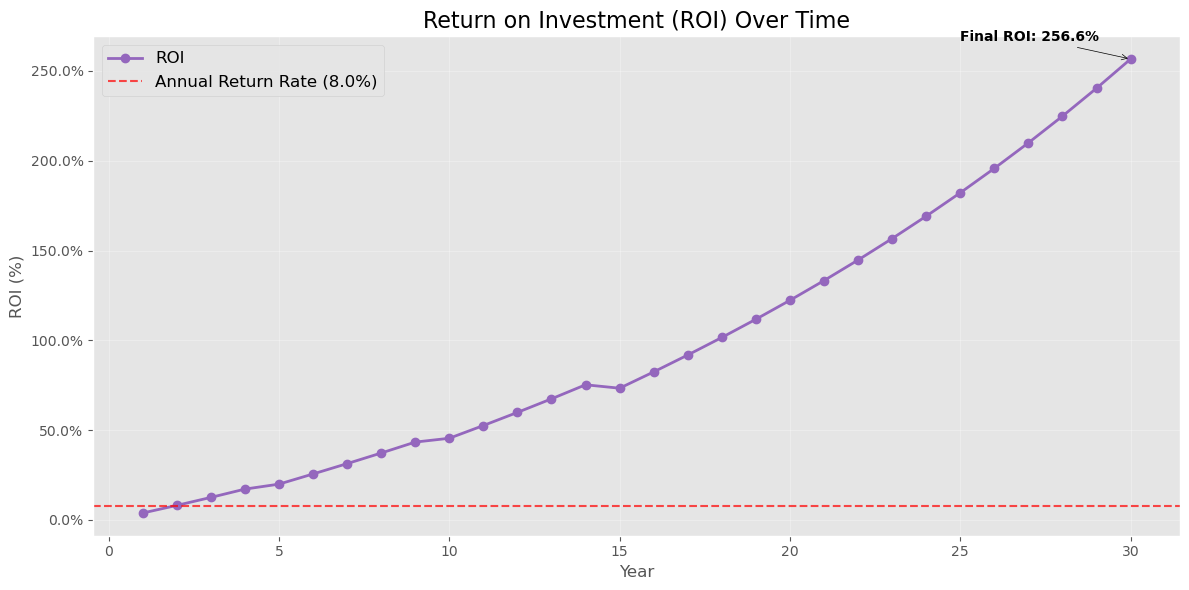

In [31]:
# Create a line chart to show the return on investment (ROI) over time
plt.figure(figsize=(12, 6))

# Calculate ROI percentage for each year
df["ROI (%)"] = (df["Investment Gain (€)"] / df["Total Contributions (€)"]) * 100

plt.plot(
    df["Year"], df["ROI (%)"], marker="o", linewidth=2, color="#9467bd", label="ROI"
)

# Add labels and title
plt.title("Return on Investment (ROI) Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("ROI (%)", fontsize=12)
plt.grid(True, alpha=0.3)

# Add a horizontal line at the average annual return
plt.axhline(
    y=annual_return * 100,
    color="red",
    linestyle="--",
    alpha=0.7,
    label=f"Annual Return Rate ({annual_return * 100:.1f}%)",
)
plt.legend(fontsize=12)

# Format y-axis
plt.gca().get_yaxis().set_major_formatter(
    plt.matplotlib.ticker.StrMethodFormatter("{x:.1f}%")
)

# Annotate the final ROI
final_roi = df["ROI (%)"].iloc[-1]
plt.annotate(
    f"Final ROI: {final_roi:.1f}%",
    xy=(df["Year"].iloc[-1], final_roi),
    xytext=(df["Year"].iloc[-1] - 5, final_roi + 10),
    arrowprops=dict(arrowstyle="->", color="black"),
    fontweight="bold",
)

plt.tight_layout()
plt.show()

In [32]:
# Create a summary of the investment
final_value = df["Total Value (€)"].iloc[-1]
total_contributions = df["Total Contributions (€)"].iloc[-1]
investment_gain = df["Investment Gain (€)"].iloc[-1]
roi_percent = df["ROI (%)"].iloc[-1]
years_invested = years

# Calculate average annual return achieved
cagr = (((final_value / initial_investment) ** (1 / years_invested)) - 1) * 100

# Calculate how much of the final value is from contributions vs gains
contribution_percent = (total_contributions / final_value) * 100
gain_percent = (investment_gain / final_value) * 100

# Create a summary dataframe
summary_data = {
    "Metric": [
        "Years Invested",
        "Initial Investment (€)",
        "Total Contributions (€)",
        "Final Investment Value (€)",
        "Investment Gain (€)",
        "Return on Investment (%)",
        "Contributions as % of Final Value",
        "Investment Gains as % of Final Value",
        "Compound Annual Growth Rate (%)",
    ],
    "Value": [
        f"{years_invested}",
        f"{initial_investment:,.2f}",
        f"{total_contributions:,.2f}",
        f"{final_value:,.2f}",
        f"{investment_gain:,.2f}",
        f"{roi_percent:.2f}%",
        f"{contribution_percent:.2f}%",
        f"{gain_percent:.2f}%",
        f"{cagr:.2f}%",
    ],
}

summary_df = pd.DataFrame(summary_data)

# Display the summary as a styled dataframe
from IPython.display import display, HTML

# Apply styling to the summary dataframe
styled_summary = (
    summary_df.style.set_properties(
        **{
            "text-align": "left",
            "font-size": "14px",
            "border": "1px solid gray",
            "padding": "8px",
        }
    )
    .set_table_styles(
        [
            {
                "selector": "th",
                "props": [
                    ("font-size", "16px"),
                    ("text-align", "center"),
                    ("background-color", "#f0f0f0"),
                    ("font-weight", "bold"),
                ],
            },
            {
                "selector": "caption",
                "props": [("font-size", "18px"), ("font-weight", "bold")],
            },
        ]
    )
    .set_caption("Investment Summary")
)

display(styled_summary)

,Metric,Value
0,Years Invested,30
1,Initial Investment (€),50.00
2,Total Contributions (€),"93,685.75"
3,Final Investment Value (€),"334,079.25"
4,Investment Gain (€),"240,393.50"
5,Return on Investment (%),256.60%
6,Contributions as % of Final Value,28.04%
7,Investment Gains as % of Final Value,71.96%
8,Compound Annual Growth Rate (%),34.12%
